# 4회차 실습 과제

## 문제 항목

| 문제     | 주제                         | 핵심 개념                                                         |
|----------|------------------------------|-------------------------------------------------------------------|
| 문제 1   | 편의점 일일 매출 분석        | 정규성 검정, 단일표본 검정 (t vs Wilcoxon), 효과크기, 모수 vs 비모수 비교 |
| 문제 2   | 두 생산라인 제품 무게 비교   | 등분산 검정, 독립표본 검정 (Welch's t vs Mann-Whitney U), 이상치 영향   |
| 문제 3   | 요일별 고객 방문 패턴 분석   | 카이제곱 적합도 검정, Cohen's w, 표준화 잔차, Cochran's rule, Monte Carlo |
| 문제 4   | 연령대별 운동 선호도 조사    | 카이제곱 독립성 검정, Cramér's V, 조정된 잔차, Fisher 정확검정 (2×2)    |

---

## 핵심 공식 정리

### 가설검정 프로세스

| 단계 | 내용                                   | 비고                                          |
|------|----------------------------------------|-----------------------------------------------|
| 1    | **분석 목표** 파악                     | 무엇을 검정하려 하는지 명확히 정의합니다       |
| 2    | **가설 설정** (H₀, H₁)                | 귀무가설과 대립가설을 수식으로 표현합니다       |
| 3    | **검정 방향** 결정                     | 양측/단측 검정을 선택하고 근거를 제시합니다     |
| 4    | **가정 검정**                          | 정규성, 등분산, 기대빈도 조건 등을 확인합니다   |
| 5    | **검정 수행**                          | 가정 결과에 따라 적절한 검정을 선택합니다       |
| 6    | **효과크기** 산출                      | 통계적 유의성과 별개로 실질적 의미를 판단합니다 |
| 7    | **결론** 도출                          | p-value와 효과크기를 종합하여 해석합니다        |

> 카이제곱 검정(적합도, 독립성)은 검정 자체가 "차이 존재 여부"를 판정하므로
> 양측/단측 개념이 적용되지 않습니다 (3단계 생략).

### 양측검정 vs 단측검정

| 구분          | 양측검정 (two-sided)           | 단측검정 (one-sided)              |
|---------------|--------------------------------|-----------------------------------|
| H₁ 형태      | μ ≠ μ₀                        | μ > μ₀ 또는 μ < μ₀              |
| 사용 시기     | 방향을 사전에 특정할 수 없을 때 | 이론적·실무적 근거로 방향이 명확할 때 |
| 검정력        | 상대적으로 낮음                | 같은 α에서 더 높은 검정력         |
| 주의          | 가장 보수적이고 안전한 선택     | 사전 근거 없이 사용하면 부적절     |

### 정규성 검정

| 방법            | 판정 기준                          | 비고                              |
|-----------------|------------------------------------|-----------------------------------|
| Shapiro-Wilk    | p > 0.05 → 정규성 기각 못 함      | 소표본에 적합, 대표본에서 과민    |
| Q-Q Plot        | 점들이 대각선 위 → 정규            | 시각적 판단, Shapiro-Wilk와 함께  |

### 검정 선택 가이드 (연속형)

| 상황            | 정규성 충족                     | 정규성 위반                   |
|-----------------|---------------------------------|-------------------------------|
| 단일·대응표본   | 단일/대응표본 t-검정            | Wilcoxon signed-rank          |
| 독립 2집단      | Student's t (등분산) / Welch's t (이분산) | Mann-Whitney U        |

### 비모수 검정 효과크기

| 효과크기         | 적용 검정               | 해석 기준 (small / medium / large) |
|------------------|-------------------------|------------------------------------|
| rank-biserial r  | Wilcoxon, Mann-Whitney  | 0.1 / 0.3 / 0.5                   |

### 카이제곱 검정

| 검정           | 공식                                                          | 자유도                   |
|----------------|---------------------------------------------------------------|--------------------------|
| 적합도 검정    | $\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$                   | $df = k - 1$            |
| 독립성 검정    | $\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$          | $df = (r-1)(c-1)$       |
| 기대빈도       | $E_{ij} = \frac{R_i \times C_j}{N}$                          | —                        |

### 효과크기 (카이제곱)

| 효과크기     | 적용 검정      | 공식                                        | 해석 기준 (small / medium / large) |
|--------------|----------------|---------------------------------------------|------------------------------------|
| Cohen's w    | 적합도         | $\sqrt{\chi^2 / N}$                        | 0.1 / 0.3 / 0.5                   |
| Cramér's V   | 독립성         | $\sqrt{\chi^2 / (N \cdot \min(r-1, c-1))}$ | df*에 따라 다름                    |
| φ (Phi)      | 독립성 (2×2)   | $\sqrt{\chi^2 / N}$                        | 0.1 / 0.3 / 0.5                   |

### Cochran's rule (기대빈도 조건)

| 조건 | 기준                                     | 위반 시 대안                              |
|------|------------------------------------------|-------------------------------------------|
| (1)  | 기대빈도 < 5인 셀이 전체의 20% 이하     | 적합도 → Monte Carlo / 범주 병합          |
| (2)  | 기대빈도 < 1인 셀이 0개                  | 독립성(2×2) → Fisher / 독립성(R×C) → FFH  |

### 판정 규칙

| p-value 결과  | 판정             | 해석                                          |
|---------------|------------------|-----------------------------------------------|
| p ≤ α         | H₀ **기각**      | "이 결과가 우연이라고 보기 어렵습니다" → 유의   |
| p > α         | H₀ **기각 실패** | "증거 부족, 판단 보류" (H₀가 참은 아닙니다!)    |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import Table
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

print("=" * 60)
print("4회차 실습 과제: 비모수 검정, 카이제곱 검정")
print("=" * 60)


4회차 실습 과제: 비모수 검정, 카이제곱 검정


---

## 문제 1: 편의점 일일 매출 분석

한 편의점 본사는 특정 지점의 일일 매출이 전국 평균 **250만원**과 다른지 확인하려 합니다.

20일간의 매출 데이터를 수집했는데, 매출 분포가 정규분포를 따르는지 먼저 확인해야 합니다.

**분석 목표**: 이 편의점의 일일 매출이 전국 평균(250만원)과 통계적으로 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [2]:
print("\n[문제 1] 편의점 일일 매출 분석")
print("=" * 50)

# 단일표본 t-검정

np.random.seed(501)
daily_sales = np.round(np.random.lognormal(mean=5.5, sigma=0.3, size=20), 1)
mu0_sales = 250.0  # 전국 평균 매출 (만원)

print(f"일일 매출 데이터 (n = {len(daily_sales)}일, 단위: 만원):")
print(daily_sales)
print(f"\n표본 평균: {np.mean(daily_sales):.1f}만원")
print(f"표본 중앙값: {np.median(daily_sales):.1f}만원")
print(f"전국 평균(μ₀): {mu0_sales}만원")



[문제 1] 편의점 일일 매출 분석
일일 매출 데이터 (n = 20일, 단위: 만원):
[249.5 157.8 304.8 352.4 137.4 213.2 298.3 209.3 363.6 363.4 194.7 418.4
 207.9 250.8 206.3 372.8 367.1 355.8 214.9 207.6]

표본 평균: 272.3만원
표본 중앙값: 250.2만원
전국 평균(μ₀): 250.0만원


### 문제 1-1: 정규성 검정 (가정 검정)

**(a)** 수치적 정규성 검정(Shapiro-Wilk)을 수행하세요.

**(b)** Q-Q Plot을 그려 시각적으로 분포를 확인하세요.

**(c)** 두 결과를 종합하여 "정규분포를 따르는가?"를 판단하고,

Q-Q Plot에서 관찰되는 패턴이 어떤 분포 특성을 나타내는지 설명하세요.

In [3]:
print("\n[문제 1-1] 정규성 검정")
print("-" * 40)

# TODO (a): 정규성 검정 수행
stat_sw, p_sw = stats.shapiro(daily_sales)

print(f"(a) 정규성 검정:")
print(f"    W = {stat_sw}")
print(f"    p-value = {p_sw}")

if p_sw >= 0.05:
    print(f"p={p_sw:.4f}, 정규성 만족 -> 모수 검정 사용")
else:
    print(f"p={p_sw:.4f}, 정규성 불만족 -> 비모수 검정 사용")



[문제 1-1] 정규성 검정
----------------------------------------
(a) 정규성 검정:
    W = 0.9127881381255227
    p-value = 0.0720445012268248
p=0.0720, 정규성 만족 -> 모수 검정 사용


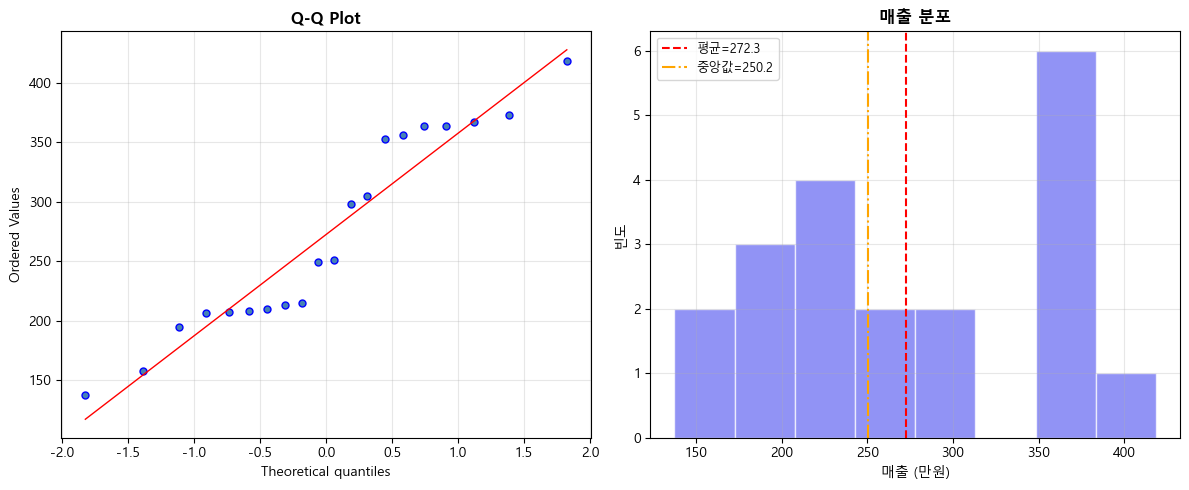

In [4]:
# TODO (b): Q-Q Plot + 히스토그램 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# TODO: Q-Q Plot 그리기
stats.probplot(daily_sales, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot", fontsize=12, fontweight="bold")
axes[0].get_lines()[0].set(markerfacecolor='steelblue',markersize=5)
axes[0].get_lines()[1].set(color='red',linewidth=1)
axes[0].grid(alpha=0.3)

# 히스토그램
axes[1].hist(daily_sales, bins=8, color="#6366F1", alpha=0.7, edgecolor="white")
axes[1].axvline(np.mean(daily_sales), color="red", linestyle="--", label=f"평균={np.mean(daily_sales):.1f}")
axes[1].axvline(np.median(daily_sales), color="orange", linestyle="-.", label=f"중앙값={np.median(daily_sales):.1f}")
axes[1].set_title("매출 분포", fontsize=12, fontweight="bold")
axes[1].set_xlabel("매출 (만원)")
axes[1].set_ylabel("빈도")
axes[1].legend(fontsize=9)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [5]:
# TODO (c): 종합 판단
print(f"\n(c) 종합 판단:")
print(f"    Shapiro-Wilk: p-value값은 {p_sw:.4f}로 정규성을 만족한다")
print(f"    Q-Q Plot 패턴: 하지만 q-q plot과 히스토그램을 확인했을 때, 기준선과 이격이 있는 모습, 쌍봉의 형태, 애초에 표본 수가 20개로 적었던 점을 고려하면 정규성을 만족한다고 보기 어렵다.")
print(f"    결론: 정규성을 위배한다고 판단, 단일표본 t-검정 대신 윌콕슨 부호 순위 검정을 시행한다.")



(c) 종합 판단:
    Shapiro-Wilk: p-value값은 0.0720로 정규성을 만족한다
    Q-Q Plot 패턴: 하지만 q-q plot과 히스토그램을 확인했을 때, 기준선과 이격이 있는 모습, 쌍봉의 형태, 애초에 표본 수가 20개로 적었던 점을 고려하면 정규성을 만족한다고 보기 어렵다.
    결론: 정규성을 위배한다고 판단, 단일표본 t-검정 대신 윌콕슨 부호 순위 검정을 시행한다.


### 문제 1-2: 가설 설정과 검정 수행

**(a)** 분석 목표에 맞는 **귀무가설(H₀)**과 **대립가설(H₁)**을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

**(c)** 정규성 검정 결과를 바탕으로, 이 데이터에 적절한 검정 방법을 선택하고 그 이유를 설명하세요.

**(d)** 선택한 검정을 수행하세요 (α = 0.05).

**(e)** 효과크기를 계산하세요.

> 모수 검정인지 비모수 검정인지에 따라 적절한 효과크기 지표가 다릅니다.
> 해석 기준과 함께 보고하세요.

**(f)** p-value와 효과크기를 종합하여 최종 결론을 내리세요.

In [6]:
print("\n[문제 1-2] 가설 설정과 검정 수행")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: mu = 250")
print(f"    H₁: mu != 250")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: 이 편의점 매출과 전국 평균 매출의 '차이'를 보기 위함이기 때문")

# TODO (c): 검정 방법 선택
print(f"\n(c) 검정 방법 선택:")
print(f"    정규성 결과: 정규성 위배")
print(f"    선택: 윌콕슨 부호 순위 검정")
print(f"    이유: 단일표본이며 연속형 변수이고, 정규성을 위배하기 때문에 윌콕슨 부호 순위 검정 사용이 적합하다.")

# TODO (d): 검정 수행
res = stats.wilcoxon(daily_sales - mu0_sales, alternative='two-sided')
test_stat = res.statistic
p_value = res.pvalue

print(f"\n(d) 검정 결과:")
print(f"    검정통계량: {test_stat}")
print(f"    p-value: {p_value:.4f}")
print(f"    판정 (α=0.05): p-value가 {p_value:.4f}로 차이가 유의하지 않기 때문에, 귀무가설을 기각하지 않는다.")

# TODO (e): 효과크기
def effect_size_wilcoxon_1samp(x, popmean):
    d = np.array(x) - popmean # 특정 기댓값(popmean)과의 차이
    d_valid = d[d != 0]
    if len(d_valid) == 0: return 0.0

    ranks = stats.rankdata(np.abs(d_valid))
    w_plus = np.sum(ranks[d_valid > 0])
    w_minus = np.sum(ranks[d_valid < 0])

    r_rb = (w_plus - w_minus) / (w_plus + w_minus)
    return r_rb

r_biserial = effect_size_wilcoxon_1samp(daily_sales, mu0_sales)
print(r_biserial)

if abs(r_biserial) < 0.1:
    effect_size_a = "무시할 만한 수준"
elif abs(r_biserial) < 0.3:
    effect_size_a = "작은"
elif abs(r_biserial) < 0.5:
    effect_size_a = "중간"
else:
    effect_size_a = "큰"

print(f"\n(e) 효과크기: {r_biserial}")
print(f"    해석: {effect_size_a} 효과크기이다.")

# TODO (f): 종합 결론
sample_mean = np.mean(daily_sales)
print(sample_mean)
sales_diff = sample_mean - mu0_sales
direction = '높음' if sample_mean > mu0_sales else '같거나 낮음'
print(f"\n(f) 종합 결론:")
print(f"    이 편의점의 매출은 전국 평균 매출과 {sales_diff:.2f}만 원만큼 차이가 있으며, {direction}울 보인다.")
print(f"    하지만 이는 p-value: {p_value:.2f}로 통계적으로 유의하지 않다.")
print(f"    효과크기는 Rank-Biserial Correlation: {r_biserial:.4f}로 {effect_size_a} 수준의 효과크기에 해당한다.")
print(f"    즉, 효과크기는 중간 수준이지만, 통계적으로 유의하지 못해 이 편의점의 매출이 전국 평균 매출과 차이가 있다고 보기 어렵다.")


[문제 1-2] 가설 설정과 검정 수행
----------------------------------------
(a) 가설 설정:
    H₀: mu = 250
    H₁: mu != 250

(b) 검정 방향:
    선택: 양측검정
    근거: 이 편의점 매출과 전국 평균 매출의 '차이'를 보기 위함이기 때문

(c) 검정 방법 선택:
    정규성 결과: 정규성 위배
    선택: 윌콕슨 부호 순위 검정
    이유: 단일표본이며 연속형 변수이고, 정규성을 위배하기 때문에 윌콕슨 부호 순위 검정 사용이 적합하다.

(d) 검정 결과:
    검정통계량: 72.0
    p-value: 0.2305
    판정 (α=0.05): p-value가 0.2305로 차이가 유의하지 않기 때문에, 귀무가설을 기각하지 않는다.
0.3142857142857143

(e) 효과크기: 0.3142857142857143
    해석: 중간 효과크기이다.
272.30000000000007

(f) 종합 결론:
    이 편의점의 매출은 전국 평균 매출과 22.30만 원만큼 차이가 있으며, 높음울 보인다.
    하지만 이는 p-value: 0.23로 통계적으로 유의하지 않다.
    효과크기는 Rank-Biserial Correlation: 0.3143로 중간 수준의 효과크기에 해당한다.
    즉, 효과크기는 중간 수준이지만, 통계적으로 유의하지 못해 이 편의점의 매출이 전국 평균 매출과 차이가 있다고 보기 어렵다.


### 문제 1-3: 모수 vs 비모수 비교

같은 데이터에 대해 **모수 검정과 비모수 검정을 모두** 수행하고, 결과를 비교해 보세요.

**(a)** 모수 검정(단일표본 t-검정)의 결과를 구하세요.

**(b)** 비모수 검정(Wilcoxon signed-rank)의 결과를 구하세요.

**(c)** 두 검정의 결론이 같은가요, 다른가요?

만약 다르다면, 이 데이터의 어떤 특성 때문에 차이가 발생하는지 설명하세요.

In [7]:
print("\n[문제 1-3] 모수 vs 비모수 비교")
print("-" * 40)

# TODO (a): 모수 검정
t_stat_1, p_t = stats.ttest_1samp(daily_sales, popmean=mu0_sales, alternative='two-sided')

print(f"(a) 단일표본 t-검정: t = {t_stat_1}, p = {p_t}")

# TODO (b): 비모수 검정
w_stat_1, p_w = stats.wilcoxon(daily_sales-mu0_sales, alternative='two-sided')

print(f"\n(b) Wilcoxon signed-rank: W = {w_stat_1}, p = {p_w}")

# TODO (c): 비교 해석
print(f"\n(c) 결과 비교 및 해석:")
print(f"    모수 검정 판정: 단일표본 t-검정 p-value: {p_t:.4f}으로 차이가 통계적으로 유의하지 못하다")
print(f"    비모수 검정 판정: 윌콕슨 부호 순위 검정 p-value: {p_w:.4f}으로 차이가 통계적으로 유의하지 못하다")
print(f"    차이 원인: 검정 결과는 같지만, 정규성 고려로 인한 검정 방법 차이로 p-value가 다르게 나타난다.")




[문제 1-3] 모수 vs 비모수 비교
----------------------------------------
(a) 단일표본 t-검정: t = 1.1877682773664504, p = 0.24956150037570585

(b) Wilcoxon signed-rank: W = 72.0, p = 0.2305126190185547

(c) 결과 비교 및 해석:
    모수 검정 판정: 단일표본 t-검정 p-value: 0.2496으로 차이가 통계적으로 유의하지 못하다
    비모수 검정 판정: 윌콕슨 부호 순위 검정 p-value: 0.2305으로 차이가 통계적으로 유의하지 못하다
    차이 원인: 검정 결과는 같지만, 정규성 고려로 인한 검정 방법 차이로 p-value가 다르게 나타난다.


---

## 문제 2: 두 생산라인 제품 무게 비교

식품 공장에서 A라인과 B라인에서 생산된 과자의 무게가 동일한지 검증합니다.

A라인은 안정적이지만, B라인은 간헐적 기계 오류로 무게 편차가 큰 것으로 의심됩니다.

**분석 목표**: 두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [8]:
print("\n[문제 2] 두 생산라인 제품 무게 비교")
print("=" * 50)

np.random.seed(502)
line_a = np.round(np.random.normal(loc=100, scale=3, size=25), 1)
line_b_normal = np.random.normal(loc=98, scale=2.5, size=20)
line_b_outlier = np.random.normal(loc=110, scale=3, size=5)
line_b = np.round(np.concatenate([line_b_normal, line_b_outlier]), 1)
np.random.shuffle(line_b)

print(f"A라인 (n={len(line_a)}): 평균={np.mean(line_a):.1f}g, 중앙값={np.median(line_a):.1f}g, SD={np.std(line_a, ddof=1):.1f}g")
print(f"B라인 (n={len(line_b)}): 평균={np.mean(line_b):.1f}g, 중앙값={np.median(line_b):.1f}g, SD={np.std(line_b, ddof=1):.1f}g")



[문제 2] 두 생산라인 제품 무게 비교
A라인 (n=25): 평균=100.0g, 중앙값=100.0g, SD=3.1g
B라인 (n=25): 평균=100.2g, 중앙값=98.5g, SD=5.2g


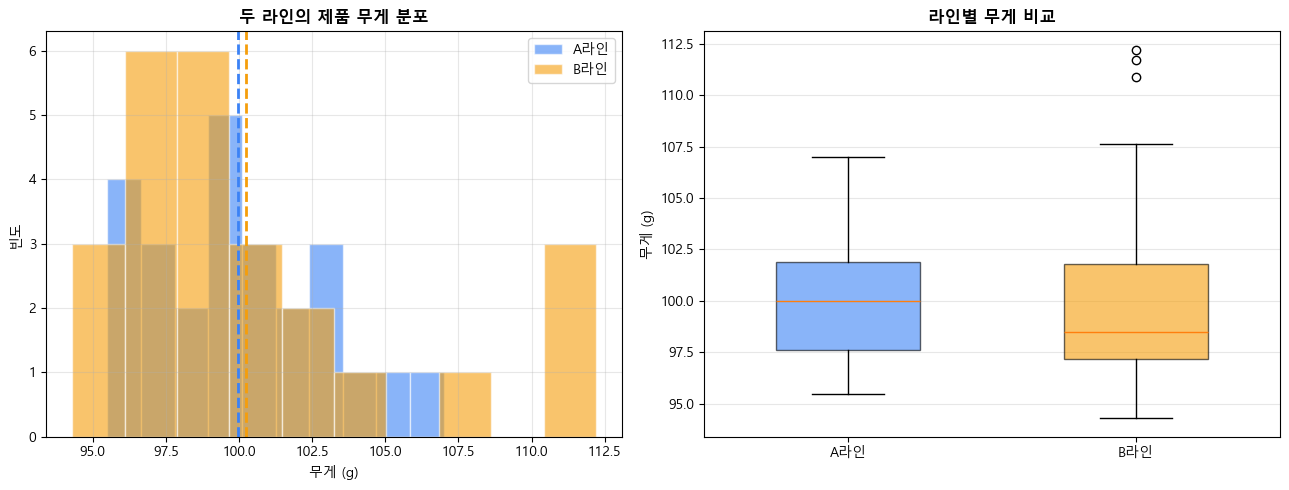

In [9]:
# 시각화: 두 라인 비교
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].hist(line_a, bins=10, alpha=0.6, color='#3B82F6', edgecolor='white', label='A라인')
axes[0].hist(line_b, bins=10, alpha=0.6, color='#F59E0B', edgecolor='white', label='B라인')
axes[0].axvline(np.mean(line_a), color='#3B82F6', linestyle='--', linewidth=2)
axes[0].axvline(np.mean(line_b), color='#F59E0B', linestyle='--', linewidth=2)
axes[0].set_xlabel('무게 (g)')
axes[0].set_ylabel('빈도')
axes[0].set_title('두 라인의 제품 무게 분포', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

bp = axes[1].boxplot([line_a, line_b], labels=['A라인', 'B라인'],
                      patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('#3B82F6')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('#F59E0B')
bp['boxes'][1].set_alpha(0.6)
axes[1].set_ylabel('무게 (g)')
axes[1].set_title('라인별 무게 비교', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 문제 2-1: 가설 설정 및 가정 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)**과 **대립가설(H₁)**을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

**(c)** 각 라인의 정규성을 검정하세요.

**(d)** 두 라인의 Q-Q Plot을 나란히 그리세요.

**(e)** 정규성이 충족된다면, 등분산 검정도 수행하세요.

**(f)** 가정 검정 결과를 종합하여 어떤 검정을 사용할지 결정하세요.

의사결정 과정을 단계별로 설명하세요.

In [10]:
print("\n[문제 2-1] 가설 설정 및 가정 검정")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: mu_a=mu_b")
print(f"    H₁: mu_a!=mu_b")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: 두 공정의 '차이'를 보기 위함이기 때문")

# TODO (c): 정규성 검정
stat_a, p_a = stats.shapiro(line_a)
stat_b, p_b = stats.shapiro(line_b)

print(f"\n(c) 정규성 검정:")
print(f"    A라인: W={stat_a}, p={p_a}")
print(f"    B라인: W={stat_b}, p={p_b}")


[문제 2-1] 가설 설정 및 가정 검정
----------------------------------------
(a) 가설 설정:
    H₀: mu_a=mu_b
    H₁: mu_a!=mu_b

(b) 검정 방향:
    선택: 양측검정
    근거: 두 공정의 '차이'를 보기 위함이기 때문

(c) 정규성 검정:
    A라인: W=0.9615916503832134, p=0.44707979729857106
    B라인: W=0.8348553450968026, p=0.0009207648072219322


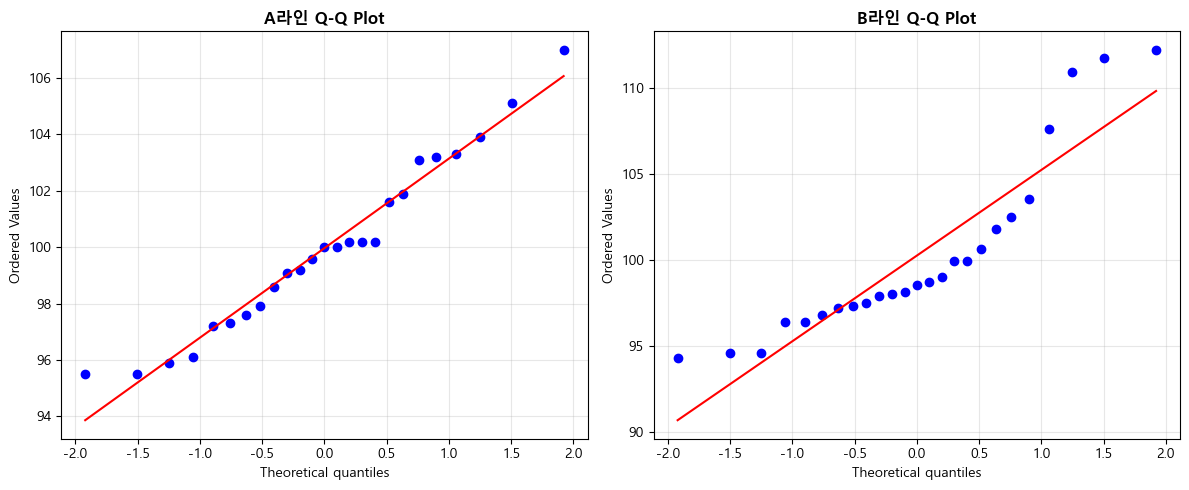

In [11]:
# TODO (d): Q-Q Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# TODO: 각 라인의 Q-Q Plot 그리기

stats.probplot(line_a,dist="norm", plot=axes[0])
stats.probplot(line_b,dist="norm", plot=axes[1])


axes[0].set_title("A라인 Q-Q Plot", fontsize=12, fontweight="bold")
axes[0].grid(alpha=0.3)
axes[1].set_title("B라인 Q-Q Plot", fontsize=12, fontweight="bold")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [12]:
# TODO (e): 등분산 검정 (정규성 충족 시)
lev_stat, lev_p = stats.levene(line_a, line_b, center='median') 

print(f"(e) 등분산 검정:")
print(f"    F={lev_stat}, p={lev_p}")
print(f"    판정: levene's test의 p-value가 {lev_p:.4f}로 등분산을 만족한다.")

# TODO (f): 검정 방법 결정
print(f"\n(f) 검정 방법 결정:")
print(f"    [1] 정규성 — A: 만족, B: 위배")
print(f"    [2] 등분산 — 만족")
print(f"    [3] 결론 → 사용할 검정: Mann-Whitney U")


(e) 등분산 검정:
    F=1.6507296774763391, p=0.20502535238595
    판정: levene's test의 p-value가 0.2050로 등분산을 만족한다.

(f) 검정 방법 결정:
    [1] 정규성 — A: 만족, B: 위배
    [2] 등분산 — 만족
    [3] 결론 → 사용할 검정: Mann-Whitney U


### 문제 2-2: 검정 수행 및 효과크기

**(a)** 2-1에서 결정한 검정을 수행하세요 (α = 0.05).

**(b)** 적절한 효과크기를 계산하세요.

> 모수 검정(t-검정)이면 Cohen's d를, 비모수 검정이면 rank-biserial r을 계산합니다.

**(c)** p-value와 효과크기를 종합하여 최종 결론을 작성하세요.

In [13]:
print("\n[문제 2-2] 검정 수행 및 효과크기")
print("-" * 40)

# TODO (a): 검정 수행
test_stat_2, p_value_2 = stats.mannwhitneyu(line_a,line_b, alternative='two-sided')

print(f"(a) 검정 결과:")
print(f"    검정통계량: {test_stat_2}")
print(f"    p-value: {p_value_2}")
print(f"    판정 (α=0.05): p-value: {p_value_2:.4f}로 둘의 차이가 유의하지 않다.")

# TODO (b): 효과크기
n1, n2 = len(line_a), len(line_b)
effect_size_2 = (2*test_stat_2)/(n1*n2)-1

print(f"\n(b) 효과크기: {effect_size_2}")

def interpret_d(d):
    if abs(d) < 0.1 :
        return "무시할 수준인"
    elif abs(d)< 0.3 :
        return "작은"
    elif abs(d) < 0.5 :
        return "중간인"
    else :
        return "큰"

lines_d = interpret_d(effect_size_2)
print(f"    해석 (작은/중간/큰): {lines_d}")

# TODO (c): 종합 결론
print(f"\n(c) 종합 결론:")
print(f"    p-value: {p_value_2:.4f}로 둘의 차이는 유의하지 않고, 효과크기: {effect_size_2:.4f}로 아주 미미하다.")



[문제 2-2] 검정 수행 및 효과크기
----------------------------------------
(a) 검정 결과:
    검정통계량: 347.5
    p-value: 0.5031183792231538
    판정 (α=0.05): p-value: 0.5031로 둘의 차이가 유의하지 않다.

(b) 효과크기: 0.1120000000000001
    해석 (작은/중간/큰): 작은

(c) 종합 결론:
    p-value: 0.5031로 둘의 차이는 유의하지 않고, 효과크기: 0.1120로 아주 미미하다.


### 문제 2-3: 모수 vs 비모수 — 왜 가정 검정이 중요한가?

**(a)** 같은 데이터에 대해 Welch's t-검정과 Mann-Whitney U 검정을 **모두** 수행하고 결과를 비교하세요.

**(b)** 두 검정의 결론이 다르다면, 어떤 검정의 결과를 더 신뢰해야 하는지 B라인의 분포 특성과 연결하여 설명하세요.

**(c)** "표본이 크면 t-검정을 써도 괜찮다"는 주장에 대해,

이 데이터의 B라인처럼 이상치가 포함된 경우에도 성립하는지 의견을 작성하세요.

In [14]:
print("\n[문제 2-3] 모수 vs 비모수 비교")
print("-" * 40)

# TODO (a): 두 검정 비교
t_stat_comp, p_t_comp = stats.ttest_ind(line_a, line_b, equal_var=True, alternative='two-sided')

u_stat_comp, p_u_comp = stats.mannwhitneyu(line_a, line_b, alternative='two-sided')


print(f"(a) 검정 결과 비교:")
print(f"    Welch's t: t={t_stat_comp}, p={p_t_comp}")
print(f"    Mann-Whitney U: U={u_stat_comp}, p={p_u_comp}")

# TODO (b): 해석
print(f"\n(b) 어떤 검정을 더 신뢰해야 하나요?")
print(f"    Mann-Whitney U 검정을 더 신뢰해야 한다.")

# TODO (c): CLT와 이상치
print(f"\n(c) 이상치가 있을 때 t-검정의 한계:")
print(f"    mwu는 순위합을 통해 검정하기 때문에 이상치에 대해 강건하다. 하지만 t-test는 평균과 표준편차를 통해 검정하기 때문에 이상치에 영향을 크게 받을 수 있다.")



[문제 2-3] 모수 vs 비모수 비교
----------------------------------------
(a) 검정 결과 비교:
    Welch's t: t=-0.22167795570919085, p=0.8255050130336914
    Mann-Whitney U: U=347.5, p=0.5031183792231538

(b) 어떤 검정을 더 신뢰해야 하나요?
    Mann-Whitney U 검정을 더 신뢰해야 한다.

(c) 이상치가 있을 때 t-검정의 한계:
    mwu는 순위합을 통해 검정하기 때문에 이상치에 대해 강건하다. 하지만 t-test는 평균과 표준편차를 통해 검정하기 때문에 이상치에 영향을 크게 받을 수 있다.


---

## 문제 3: 요일별 고객 방문 패턴 분석

한 음식점 사장이 "요일에 따라 방문 고객 수가 다르지 않다"고 주장합니다.

한 주간 방문 고객 수를 조사하여 이 주장을 검증합니다.

총 **420명**의 고객이 방문했습니다.

**분석 목표**: 요일별 고객 방문 비율이 균등(각 1/7)한지 검정합니다.

**주어진 데이터:**

In [15]:
print("\n[문제 3] 요일별 고객 방문 패턴 분석")
print("=" * 50)

np.random.seed(503)
days = ['월', '화', '수', '목', '금', '토', '일']
true_probs = [0.10, 0.10, 0.12, 0.12, 0.16, 0.22, 0.18]
visits = np.random.choice(days, size=420, p=true_probs)
observed_visits = np.array([np.sum(visits == d) for d in days])

print(f"요일별 방문 고객 수 (총 {observed_visits.sum()}명):")
df_visits = pd.DataFrame({'요일': days, '관측 빈도': observed_visits})
display(df_visits)



[문제 3] 요일별 고객 방문 패턴 분석
요일별 방문 고객 수 (총 420명):


,요일,관측 빈도
0,월,50
1,화,43
2,수,40
3,목,54
4,금,69
5,토,89
6,일,75


### 문제 3-1: 가설 설정 및 적합도 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

> 카이제곱 검정은 "차이가 존재하는가?"를 판정하므로 양측/단측 개념이 적용되지 않습니다.

**(b)** 기대빈도를 계산하고, Cochran's rule을 확인하세요.

기대빈도 < 5인 셀이 전체의 20%를 초과하거나 기대빈도 < 1인 셀이 있는지 점검하세요.

**(c)** 적합도 검정을 수행하세요 (α = 0.05).

**(d)** 결론을 내리세요.

In [16]:
print("\n[문제 3-1] 가설 설정 및 적합도 검정")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 요일 별 방문자 수 비율은 모두 동일하다.")
print(f"    H₁: 요일별 방문자 수 비율은 적어도 하나는 다르다.")

# TODO (b): 기대빈도 + Cochran's rule 확인
n_total_visits = observed_visits.sum()

k = len(days)

expected_visits = np.full(k, n_total_visits / k)

print(f"\n(b) 기대빈도: {expected_visits}")
# Cochran's rule 점검
def check_cochran(data):
    total_cells = len(data)
    low_5 = (data < 5).sum()
    low_1 = (data < 1).any()
    ratio = low_5 / total_cells
    
    if low_1==True:
        print("위배")
    elif ratio > 0.2:
        print("위배")
    else:
        print("코크란 규칙 만족")
    return low_5, ratio
    
check_cochran(expected_visits)

# TODO (c): 적합도 검정
chi2_visits, p_visits = stats.chisquare(f_obs = observed_visits, f_exp = expected_visits)

print(f"\n(c) 적합도 검정:")
print(f"    χ² = {chi2_visits}")
print(f"    자유도 (df) = {len(days) - 1}")
print(f"    p-value = {p_visits}")

# TODO (d): 결론
print(f"\n(d) 결론 (α=0.05):")
print(f"    p-value: {p_visits:.6f}로 요일 별 기대 방문자 수와의 차이가 통계적으로 유의하지 않다. 귀무가설 기각 실패.")



[문제 3-1] 가설 설정 및 적합도 검정
----------------------------------------
(a) 가설 설정:
    H₀: 요일 별 방문자 수 비율은 모두 동일하다.
    H₁: 요일별 방문자 수 비율은 적어도 하나는 다르다.

(b) 기대빈도: [60. 60. 60. 60. 60. 60. 60.]
코크란 규칙 만족

(c) 적합도 검정:
    χ² = 32.86666666666667
    자유도 (df) = 6
    p-value = 1.1123757485602509e-05

(d) 결론 (α=0.05):
    p-value: 0.000011로 요일 별 기대 방문자 수와의 차이가 통계적으로 유의하지 않다. 귀무가설 기각 실패.


### 문제 3-2: 효과크기와 사후분석 (잔차 분석)

**(a)** 효과크기(Cohen's w)를 계산하고 해석하세요.

**(b)** 표준화 잔차를 계산하세요.

**각 요일**에 대해 잔차 값과 방향(기대보다 많음/적음)을 보고하세요.

> 표준화 잔차 = (O − E) / √E

**(c)** |잔차| > 2인 요일을 찾고, 이 요일들이 왜 기대와 다른지 실생활 관점에서 해석하세요.

**(d)** 관측 빈도와 기대 빈도를 비교하는 막대 그래프를 그리세요.

In [17]:
print("\n[문제 3-2] 효과크기와 사후분석")
print("-" * 40)

# TODO (a): Cohen's w

cohens_w_visits = np.sqrt(chi2_visits/observed_visits.sum())

print(f"(a) Cohen's w = {cohens_w_visits}")
if cohens_w_visits < 0.1:
    print("무시할 만한 수준")
elif cohens_w_visits < 0.3:
    print("작음")
elif cohens_w_visits < 0.5:
    print("중간")
else :
    print("큼")

# TODO (b): 표준화 잔차
print(f"\n(b) 사후분석 — 표준화 잔차:")
p_i = expected_visits / observed_visits.sum()
std_resid = (observed_visits-expected_visits) / np.sqrt(expected_visits*(1-p_i))
print(std_resid)

# TODO (c): 해석
print(f"\n(c) |잔차| > 2인 요일 해석:")
# 요일과 std_resid 를 DF로 만들어서 출력?
result_df = pd.DataFrame({
    '요일' : days,
    '표준화 잔차' : std_resid
})

for d,i in enumerate(std_resid):
    if abs(i) > 2:
        print(f"{days[d]}요일의 표준화 잔차: {abs(i):.4f}는 기대빈도와 유의하게 다르다.")
    else:
        print(f"{days[d]}요일의 표준화 잔차는 유의한 차이가 없다.")



[문제 3-2] 효과크기와 사후분석
----------------------------------------
(a) Cohen's w = 0.279739107480467
작음

(b) 사후분석 — 표준화 잔차:
[-1.39443338 -2.37053674 -2.78886676 -0.83666003  1.25499004  4.04385679
  2.09165007]

(c) |잔차| > 2인 요일 해석:
월요일의 표준화 잔차는 유의한 차이가 없다.
화요일의 표준화 잔차: 2.3705는 기대빈도와 유의하게 다르다.
수요일의 표준화 잔차: 2.7889는 기대빈도와 유의하게 다르다.
목요일의 표준화 잔차는 유의한 차이가 없다.
금요일의 표준화 잔차는 유의한 차이가 없다.
토요일의 표준화 잔차: 4.0439는 기대빈도와 유의하게 다르다.
일요일의 표준화 잔차: 2.0917는 기대빈도와 유의하게 다르다.


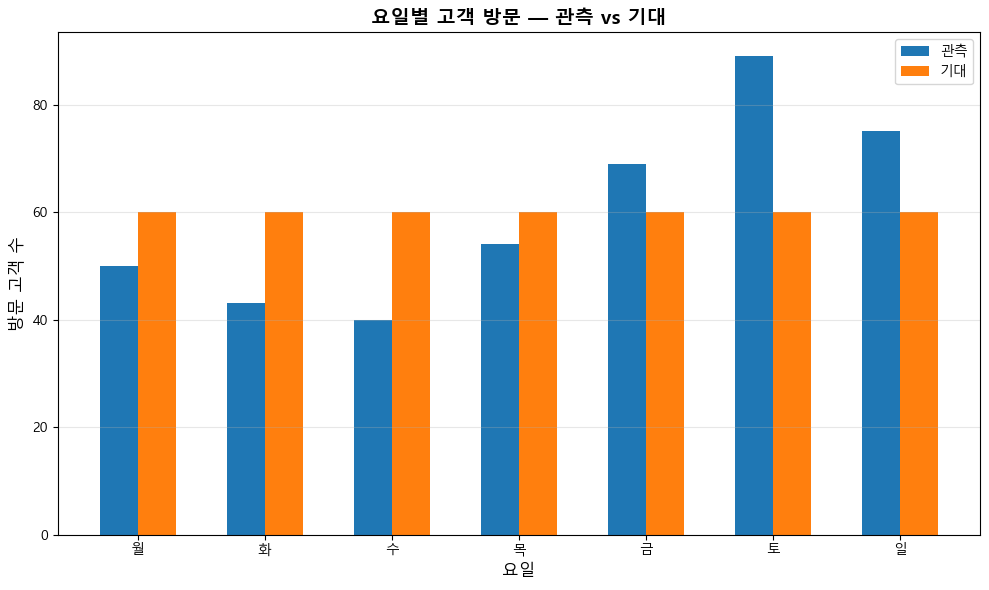

In [18]:
# TODO (d): 관측 vs 기대 빈도 막대 그래프
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(days))
width = 0.35

# TODO: 관측/기대 빈도 나란히 막대 그래프
ax.bar(x - 0.15, observed_visits, 0.3, label='관측')
ax.bar(x + 0.15, expected_visits, 0.3, label='기대')
ax.set_xlabel('요일', fontsize=12)
ax.set_ylabel('방문 고객 수', fontsize=12)
ax.set_title('요일별 고객 방문 — 관측 vs 기대', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 문제 3-3: 소규모 카페 음료 선호도

위와 별개 상황입니다. 한 소규모 카페에서 5가지 음료의 선호도가 균등한지 조사했습니다.

총 **22명**의 고객이 응답했습니다.

**분석 목표**: 5가지 음료의 선호도가 균등(각 1/5)한지 검정합니다.

**주어진 데이터:**

In [19]:
print("\n[문제 3-3] 소규모 카페 음료 선호도")
print("-" * 40)

menu = ['아메리카노', '라떼', '카푸치노', '스무디', '에이드']
observed_small = np.array([8, 5, 4, 3, 2])
n_total_small = observed_small.sum()

print(f"음료별 선호 고객 수 (총 {n_total_small}명):")
df_small = pd.DataFrame({'음료': menu, '관측 빈도': observed_small})
display(df_small)


[문제 3-3] 소규모 카페 음료 선호도
----------------------------------------
음료별 선호 고객 수 (총 22명):


,음료,관측 빈도
0,아메리카노,8
1,라떼,5
2,카푸치노,4
3,스무디,3
4,에이드,2


**(a)** 가설을 설정하세요.

**(b)** 균등 분포를 가정할 때 기대빈도를 계산하고, Cochran's rule을 점검하세요. 조건이 충족되나요?

**(c)** Cochran's rule이 위반되면, 사용할 수 있는 대안 방법은 무엇인가요?
  - 범주 병합과 Monte Carlo 시뮬레이션 중 어떤 것이 이 상황에 더 적절한지 설명하세요.

**(d)** 선택한 대안 방법을 적용하여 검정을 수행하세요.

**(e)** 효과크기(Cohen's w)를 계산하고 해석하세요.

In [20]:
# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 모든 메뉴의 선호도가 기대빈도와 같다.")
print(f"    H₁: 선호도가 기대빈도와 다른 메뉴가 하나라도 존재한다.")

# TODO (b): 기대빈도 + Cochran's rule
k_small = len(menu)
expected_small = np.full(k_small, n_total_small/k_small)

print(f"\n(b) 기대빈도: {expected_small}")
expected_prob = expected_small/n_total_small


def small_check_cochran(data):
    total_cells = len(data)
    low_5 = (data < 5).sum()
    low_1 = (data < 1).any()
    ratio = low_5 / total_cells
        
    return low_1, low_5, ratio

small_low_1, small_low_5, small_ratio = small_check_cochran(expected_small)
print(f"    기대빈도 < 5인 셀: {small_low_5}개 ({small_ratio:.0%})")

if small_low_1==True:
    print("    코크란 규칙 위배")
elif small_ratio > 0.2:
    print("    코크란 규칙 위배")
else:
    print("    코크란 규칙 만족")

# TODO (c): 대안 방법 선택
print(f"\n(c) 대안 방법:")
print(f"    기대빈도 부족으로 코크란 규칙을 위배한다")
print(f"    하지만, 변수의 특성 상 범주 병합이 불가능하여 몬테카를로 시뮬레이션 시행")

# TODO (d): 검정 수행 (선택한 대안)
# Monte Carlo 시뮬레이션을 직접 구현하거나, 범주 병합 후 검정
obs_stat = stats.chisquare(observed_small, f_exp=expected_small).statistic
n_simul = 100000
sim_samples = stats.multinomial.rvs(n_total_small, expected_prob, size=n_simul)
sim_stats = stats.chisquare(sim_samples, f_exp=expected_small, axis=1).statistic
p_alternative = (sim_stats >= obs_stat).mean()

print(f"\n(d) 검정 결과:")
print(f"    p-value: {p_alternative}")
print(f"    판정 (α=0.05): 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없다.")

# TODO (e): 효과크기



cohens_w_small = np.sqrt(obs_stat/n_total_small)

print(f"\n(e) Cohen's w = {cohens_w_small}")
print(f"    해석: Cohen's w가 0.3보다 크고 0.5보다 작으므로 중간 정도의 효과크기이며 실용적으로 의미 있는 괴리가 있다고 볼 수 있다.")



(a) 가설 설정:
    H₀: 모든 메뉴의 선호도가 기대빈도와 같다.
    H₁: 선호도가 기대빈도와 다른 메뉴가 하나라도 존재한다.

(b) 기대빈도: [4.4 4.4 4.4 4.4 4.4]
    기대빈도 < 5인 셀: 5개 (100%)
    코크란 규칙 위배

(c) 대안 방법:
    기대빈도 부족으로 코크란 규칙을 위배한다
    하지만, 변수의 특성 상 범주 병합이 불가능하여 몬테카를로 시뮬레이션 시행

(d) 검정 결과:
    p-value: 0.33822
    판정 (α=0.05): 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없다.

(e) Cohen's w = 0.4679831882266818
    해석: Cohen's w가 0.3보다 크고 0.5보다 작으므로 중간 정도의 효과크기이며 실용적으로 의미 있는 괴리가 있다고 볼 수 있다.


---

## 문제 4: 연령대별 운동 선호도 조사

헬스장에서 연령대(20대/30대/40대)에 따라 선호하는 운동 종류(헬스/요가/수영)가 다른지 조사합니다.

총 **180명**을 대상으로 설문을 실시했습니다.

**분석 목표**: 연령대에 따라 선호하는 운동 종류에 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [21]:
print("\n[문제 4] 연령대별 운동 선호도 조사")
print("=" * 50)

np.random.seed(504)
n_survey = 180

ages = np.random.choice(['20대', '30대', '40대'], size=n_survey, p=[0.35, 0.35, 0.30])

exercise_prefs = []
for age in ages:
    if age == '20대':
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.50, 0.20, 0.30]))
    elif age == '30대':
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.30, 0.40, 0.30]))
    else:
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.20, 0.35, 0.45]))
exercise_prefs = np.array(exercise_prefs)

df_survey = pd.DataFrame({'연령대': ages, '운동': exercise_prefs})

ct_exercise = pd.crosstab(df_survey['연령대'], df_survey['운동'],
                            margins=True, margins_name='합계')
print("\n교차표:")
display(ct_exercise)



[문제 4] 연령대별 운동 선호도 조사

교차표:


운동,수영,요가,헬스,합계
연령대,,,,
20대,18,19,29,66
30대,19,22,19,60
40대,29,16,9,54
합계,66,57,57,180


### 문제 4-1: 가설 설정 및 독립성 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

**(b)** 기대빈도를 계산하고 표로 출력하세요.

  - Cochran's rule(기대빈도 < 5인 셀이 20% 이하, 기대빈도 < 1인 셀이 0개)을 점검하세요.

**(c)** 조건 충족 여부에 따라 적절한 검정을 수행하세요 (α = 0.05).

**(d)** 결론을 내리세요.

In [51]:
print("\n[문제 4-1] 가설 설정 및 독립성 검정")
print("-" * 40)

ct_raw_ex = pd.crosstab(df_survey['연령대'], df_survey['운동'])

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 연령대 별 운동 선호 비율이 모두 같다")
print(f"    H₁: 연령대 별 운동 선호 비율이 다른 것이 하나라도 존재한다.")

# TODO (b): 기대빈도 + Cochran's rule
# 20대 66명 / 30대 60명 / 40대 54명 -> 총 180명
# 모든 연령대해 대해 각 운동 선호 비율인 66:57:57의 비율을 따르는 지 확인한다.

# chi squared independence test
chi2_ex, p_ex, dof_ex, expected_ex = stats.chi2_contingency(ct_raw_ex)

print(f"\n(b) 기대빈도:")
display(expected_ex)

# Cochran's rule 점검
total_cells = expected_ex.size
low_5 = (expected_ex<5).sum()
low_1 = (expected_ex<1).any()
ratio = low_5/total_cells
if low_1:
    print("E < 1 존재 -> Fisher 정확검정")
elif ratio > 0.2:
    print(f"E < 5 비율 = {ratio:.1%} (> 20%) -> Fisher 또는 범주 병합")
else:
    print(f"Cochran 규칙 충족 -> chi^2 검정")
# TODO (c): 검정 수행
print(f"\n(c) 독립성 검정:")
print(f"    χ² = {chi2_ex}")
print(f"    자유도 (df) = {dof_ex}")
print(f"    p-value = {p_ex}")

# TODO (d): 결론
print(f"\n(d) 결론 (α=0.05):")
print(f"    p-value: {p_ex:.4f}로 연령대 별 운동 선호가 독립적이라는 귀무가설을 기각한다.")



[문제 4-1] 가설 설정 및 독립성 검정
----------------------------------------
(a) 가설 설정:
    H₀: 연령대 별 운동 선호 비율이 모두 같다
    H₁: 연령대 별 운동 선호 비율이 다른 것이 하나라도 존재한다.

(b) 기대빈도:


array([[24.2, 20.9, 20.9],
       [22. , 19. , 19. ],
       [19.8, 17.1, 17.1]])

Cochran 규칙 충족 -> chi^2 검정

(c) 독립성 검정:
    χ² = 13.965516408100141
    자유도 (df) = 4
    p-value = 0.0074059302638624525

(d) 결론 (α=0.05):
    p-value: 0.0074로 연령대 별 운동 선호가 독립적이라는 귀무가설을 기각한다.


### 문제 4-2: 효과크기와 사후분석 (조정된 잔차)

**(a)** Cramér's V를 계산하고 해석하세요.

df* = min(r−1, c−1)에 따른 해석 기준을 적용하세요.

**(b)** 조정된 잔차(표준화 잔차)를 구하고 표로 출력하세요.

**(c)** 각 셀이 의미하는 바를 구체적으로 해석하세요.
> 예: "20대 × 헬스: 잔차 = +2.5 → 20대는 기대보다 헬스를 더 많이 선호합니다"

**(d)** 관측 빈도와 기대 빈도를 비교하는 히트맵을 나란히 그리세요.

In [38]:
print("\n[문제 4-2] 효과크기와 사후분석")
print("-" * 40)

# TODO (a): Cramér's V
r_ex, c_ex = ct_raw_ex.shape
df_star_ex = min(r_ex - 1, c_ex - 1)
n_obs = ct_raw_ex.values.sum()


cramers_v_ex = np.sqrt(chi2_ex/(n_obs*(df_star_ex)))

print(f"(a) Cramér's V = {cramers_v_ex}")
print(f"    df* = {df_star_ex}")
# Cramér's V 해석 기준 (df*에 따라 계산)
print(f"    해석: df={df_star_ex}이고 효과크기는 {cramers_v_ex:.4f}로, 중간 크기로 나타난다.")

# TODO (b): 조정된 잔차
# 조정된 잔차를 계산하여 DataFrame으로 만드세요

table = Table(ct_raw_ex)
std_res_ex = table.standardized_resids

print(f"\n(b) 조정된 잔차:")
display(std_res_ex)

# TODO (c): |잔차| > 2인 셀 해석
print(f"\n(c) |잔차| > 2인 셀:")
for i in range(std_res_ex.shape[0]):
    for j in range(std_res_ex.shape[1]):
        val = std_res_ex.iloc[i,j]
        if abs(val)>2:
            print(f"-> [{std_res_ex.index[i]}, {std_res_ex.columns[j]}]의 조정된 잔차: {val:.4f} -> 기대와 유의하게 다릅니다.")
        else:
            print(f"[{std_res_ex.index[i]}, {std_res_ex.columns[j]}]의 조정된 잔차: {val:.4f} -> 기대와 다르다고 보기 어렵습니다.")




[문제 4-2] 효과크기와 사후분석
----------------------------------------
(a) Cramér's V = 0.19695964341359756
    df* = 2
    해석: df=2이고 효과크기는 0.1970로, 중간 크기로 나타난다.

(b) 조정된 잔차:


운동,수영,요가,헬스
연령대,,,
20대,-1.989994,-0.631754,2.693267e+00
30대,-0.984327,1.019703,1.207571e-15
40대,3.105203,-0.384618,-2.832185e+00



(c) |잔차| > 2인 셀:
[20대, 수영]의 조정된 잔차: -1.9900 -> 기대와 다르다고 보기 어렵습니다.
[20대, 요가]의 조정된 잔차: -0.6318 -> 기대와 다르다고 보기 어렵습니다.
-> [20대, 헬스]의 조정된 잔차: 2.6933 -> 기대와 유의하게 다릅니다.
[30대, 수영]의 조정된 잔차: -0.9843 -> 기대와 다르다고 보기 어렵습니다.
[30대, 요가]의 조정된 잔차: 1.0197 -> 기대와 다르다고 보기 어렵습니다.
[30대, 헬스]의 조정된 잔차: 0.0000 -> 기대와 다르다고 보기 어렵습니다.
-> [40대, 수영]의 조정된 잔차: 3.1052 -> 기대와 유의하게 다릅니다.
[40대, 요가]의 조정된 잔차: -0.3846 -> 기대와 다르다고 보기 어렵습니다.
-> [40대, 헬스]의 조정된 잔차: -2.8322 -> 기대와 유의하게 다릅니다.


관측 빈도
[[18 19 29]
 [19 22 19]
 [29 16  9]]
기대 빈도
[[24.2 20.9 20.9]
 [22.  19.  19. ]
 [19.8 17.1 17.1]]


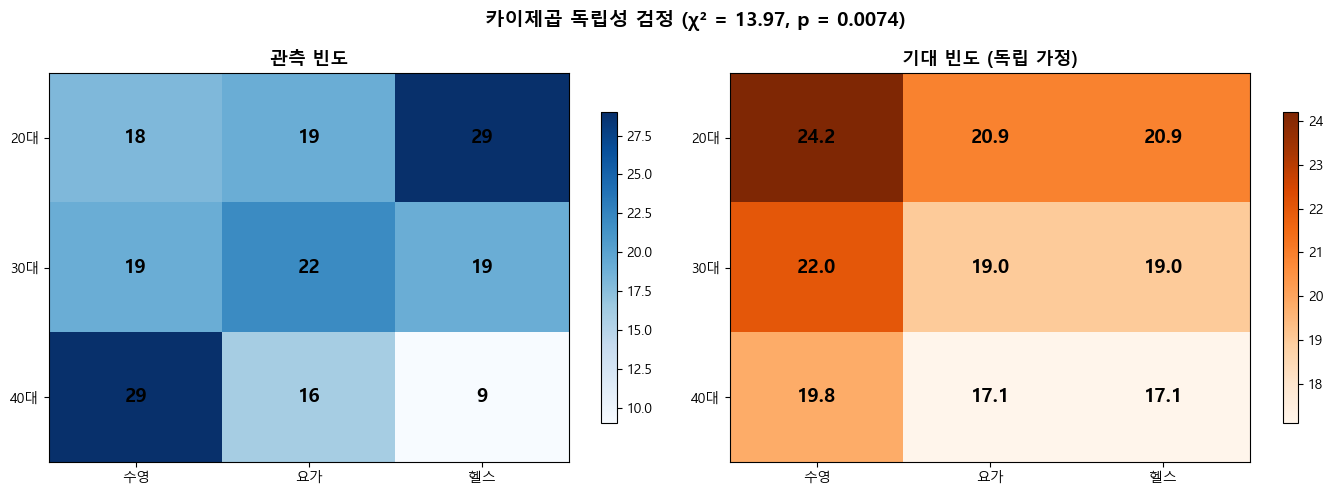

In [ ]:
# TODO (d): 히트맵 시각화 (관측 빈도 vs 기대 빈도)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ct_obs_ex = ct_raw_ex.values
print("관측 빈도")
print(ct_obs_ex)
print("기대 빈도")
print(expected_ex)
# TODO: 관측 빈도 히트맵
im1 = axes[0].imshow(ct_obs_ex, cmap='Blues', aspect='auto')
axes[0].set_title('관측 빈도', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(len(ct_raw_ex.columns)))
axes[0].set_xticklabels(ct_raw_ex.columns)
axes[0].set_yticks(range(len(ct_raw_ex.index)))
axes[0].set_yticklabels(ct_raw_ex.index)
for i in range(ct_obs_ex.shape[0]):
    for j in range(ct_obs_ex.shape[1]):
        axes[0].text(j, i, f'{ct_obs_ex[i, j]}', ha='center', va='center',
                     fontsize=14, fontweight='bold')
plt.colorbar(im1, ax=axes[0], shrink=0.8)


# TODO: 기대 빈도 히트맵
im2 = axes[1].imshow(expected_ex, cmap='Oranges', aspect='auto')
axes[1].set_title('기대 빈도 (독립 가정)', fontsize=13, fontweight='bold')
axes[1].set_xticks(range(len(ct_raw_ex.columns)))
axes[1].set_xticklabels(ct_raw_ex.columns)
axes[1].set_yticks(range(len(ct_raw_ex.index)))
axes[1].set_yticklabels(ct_raw_ex.index)
for i in range(expected_ex.shape[0]):
    for j in range(expected_ex.shape[1]):
        axes[1].text(j, i, f'{expected_ex[i, j]:.1f}', ha='center', va='center',
                     fontsize=14, fontweight='bold')
plt.colorbar(im2, ax=axes[1], shrink=0.8)

fig.suptitle(f"카이제곱 독립성 검정 (χ² = {chi2_ex:.2f}, p = {p_ex:.4f})",
             fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()


### 문제 4-3: 면접 방식별 합격률

위 데이터와 별개로, 한 중소기업 인사팀에서 **면접 방식**(대면/화상)에 따라

최종 합격률이 다른지 파악하려 합니다.

소규모 채용 회차로 총 **20명**의 지원자 데이터입니다.

**분석 목표**: 면접 방식(대면/화상)에 따라 최종 합격률에 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [25]:
print("\n[문제 4-3] 면접 방식별 합격률")
print("-" * 40)

# 2×2 교차표
#              합격    불합격
# 대면 면접     7       3      = 10
# 화상 면접     2       8      = 10
#               9      11      = 20
data_fisher_q4 = np.array([[7, 3],
                             [2, 8]])

ct_fisher_q4 = pd.DataFrame(data_fisher_q4,
                              index=['대면 면접', '화상 면접'],
                              columns=['합격', '불합격'])
ct_display_q4 = ct_fisher_q4.copy()
ct_display_q4['합계'] = ct_display_q4.sum(axis=1)
ct_display_q4.loc['합계'] = ct_display_q4.sum()
print("교차표:")
display(ct_display_q4)



[문제 4-3] 면접 방식별 합격률
----------------------------------------
교차표:


,합격,불합격,합계
대면 면접,7,3,10
화상 면접,2,8,10
합계,9,11,20


**(a)** **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

> Fisher 정확검정에서는 양측/단측 선택이 결과에 직접 영향을 줍니다.

**(c)** 기대빈도를 계산하고 Cochran's rule을 점검하세요.

카이제곱 검정을 적용할 수 있는지 판단하세요.

**(d)** 적절한 검정을 선택하여 수행하세요 (α = 0.05).

왜 이 검정을 선택했는지 이유를 설명하세요.

**(e)** 오즈비(OR)를 구하고 해석하세요.

> 오즈(Odds) = 해당 사건 / 반대 사건 \
> 오즈비(OR) = 한 집단의 오즈 / 다른 집단의 오즈 \
> 예: 대면 면접의 합격 오즈 = 합격 / 불합격

**(f)** 효과크기 φ(Phi) 계수를 계산하고 해석하세요.

In [ ]:
# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 대면 면접과 화상 면접의 합격률은 동일하다")
print(f"    H₁: 대면 면접과 화상 면접의 합격률은 다르다.")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: 합격률의 '차이'를 보기 위함이기 때문")

# TODO (c): 기대빈도 + Cochran's rule
chi2_q4, p_chi2_q4, dof_q4, expected_q4 = stats.chi2_contingency(ct_fisher_q4)

print(f"\n(c) 기대빈도:")
print(expected_q4)

total_cells_q4 = expected_q4.size
low_5_q4 = (expected_q4<5).sum()
low_1_q4 = (expected_q4<1).any()
ratio_q4 = low_5_q4/total_cells_q4
if low_1_q4:
    print("E<1 존재 -> Fisher")
elif ratio_q4 > 0.2:
    print("기대빈도 5 미만 비율 > 20% -> Fisher 또는 범주 병합")
else :
    print("코크런 룰 만족 -> 카이제곱 검정 시행")

print(f"    카이제곱 적용 가능 여부: 불가")

print("    병합할 수 있는 범주가 없으니 Fisher 정확 검정 수행")

# TODO (d): 검정 수행

odds_ratio_q4, fisher_p_q4 = stats.fisher_exact(ct_fisher_q4)



print(f"\n(d) 검정 결과:")
print(f"    p-value = {fisher_p_q4}")
print(f"    판정 (α=0.05): fisher p-value: {fisher_p_q4:.4f}로 귀무가설을 유의하게 기각한다. 대면 면접과 화상 면접의 합격률은 다르다고 볼 수 있다.")
print(f"    검정 선택 이유: 병합할 수 있는 범주가 없으니 Fisher 정확 검정 수행했음.")

# TODO (e): 오즈비 해석
print(f"\n(e) 오즈비:")
print(f"    OR = {odds_ratio_q4}")
print(f"    OR값에 따라 대면 면접이 화상 면접보다 합격할 odds가 약 9.3배 높다고 볼 수 있다.")


# TODO (f): Phi 계수

chi2_q4_Phi, _, _, _ = stats.chi2_contingency(ct_fisher_q4,correction=False)

n_obs_q4 = ct_fisher_q4.values.sum()



phi_q4 = np.sqrt(chi2_q4_Phi/n_obs_q4)

print(f"\n(f) Phi 계수(φ) = {phi_q4}")
print(f"    해석: Phi 계수: {phi_q4:.4f}로 강한 연관성이 있다고 볼 수 있다.")



(a) 가설 설정:
    H₀: 대면 면접과 화상 면접의 합격률은 동일하다
    H₁: 대면 면접과 화상 면접의 합격률은 다르다.

(b) 검정 방향:
    선택: 양측검정
    근거: 합격률의 '차이'를 보기 위함이기 때문

(c) 기대빈도:
[[4.5 5.5]
 [4.5 5.5]]
기대빈도 5 미만 비율 > 20% -> Fisher 또는 범주 병합
    카이제곱 적용 가능 여부: 불가
    병합할 수 있는 범주가 없으니 Fisher 정확 검정 수행

(d) 검정 결과:
    p-value = 0.06977851869492736
    판정 (α=0.05): fisher p-value: 0.0698로 귀무가설을 유의하게 기각한다. 대면 면접과 화상 면접의 합격률은 다르다고 볼 수 있다.
    검정 선택 이유: 병합할 수 있는 범주가 없으니 Fisher 정확 검정 수행했음.

(e) 오즈비:
    OR = 9.333333333333334
    OR값에 따라 대면 면접이 화상 면접보다 합격할 odds가 약 9.3배 높다고 볼 수 있다.

(f) Phi 계수(φ) = 0.502518907629606
    해석: Phi 계수: 0.5025로 중간 효과라고 볼 수 있다.
